In [2]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile

In [3]:
def dropbox_dl(link):
  new = link.replace('www.dropbox.com', 'dl.dropboxusercontent.com')
  return new

new = dropbox_dl('https://www.dropbox.com/s/dzie78zcgy1r0ah/train-hands.zip?dl=0')

print(new)

https://dl.dropboxusercontent.com/s/dzie78zcgy1r0ah/train-hands.zip?dl=0


In [3]:
!wget --no-check-certificate --content-disposition https://dl.dropboxusercontent.com/s/dzie78zcgy1r0ah/train-hands.zip?dl=0 /content/train-hands.zip

--2020-07-31 04:02:05--  https://dl.dropboxusercontent.com/s/dzie78zcgy1r0ah/train-hands.zip?dl=0
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.1.15, 2620:100:6016:15::a27d:10f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.1.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75062934 (72M) [application/zip]
Saving to: ‘train-hands.zip.3’

train-hands.zip.3   100%[===================>]  71.58M  57.4MB/s    in 1.2s    

2020-07-31 04:02:06 (57.4 MB/s) - ‘train-hands.zip.3’ saved [75062934/75062934]

/content/train-hands.zip: Scheme missing.
FINISHED --2020-07-31 04:02:06--
Total wall clock time: 1.9s
Downloaded: 1 files, 72M in 1.2s (57.4 MB/s)


In [4]:
new = dropbox_dl('https://www.dropbox.com/s/1whnf8ebxdo5ih7/valid-hands.zip?dl=0')

print(new)

https://dl.dropboxusercontent.com/s/1whnf8ebxdo5ih7/valid-hands.zip?dl=0


In [5]:
!wget --no-check-certificate --content-disposition https://dl.dropboxusercontent.com/s/1whnf8ebxdo5ih7/valid-hands.zip?dl=0 /content/valid-hands.zip

--2020-07-31 04:02:07--  https://dl.dropboxusercontent.com/s/1whnf8ebxdo5ih7/valid-hands.zip?dl=0
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.1.15, 2620:100:6016:15::a27d:10f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.1.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11476260 (11M) [application/zip]
Saving to: ‘valid-hands.zip.3’

valid-hands.zip.3   100%[===================>]  10.94M  50.7MB/s    in 0.2s    

2020-07-31 04:02:08 (50.7 MB/s) - ‘valid-hands.zip.3’ saved [11476260/11476260]

/content/valid-hands.zip: Scheme missing.
FINISHED --2020-07-31 04:02:08--
Total wall clock time: 0.7s
Downloaded: 1 files, 11M in 0.2s (50.7 MB/s)


In [6]:
train_zip = '/content/train-hands.zip'
train_dir = '/content/train-hands'

valid_zip = '/content/valid-hands.zip'
valid_dir = '/content/valid-hands'


with zipfile.ZipFile(train_zip, 'r') as zip_ref:
    zip_ref.extractall(train_dir)

with zipfile.ZipFile(valid_zip, 'r') as zip_ref:
    zip_ref.extractall(valid_dir)

BadZipFile: ignored

In [4]:
train_one = '/content/train-hands/train-hands/one'
train_two = '/content/train-hands/train-hands/two'
train_three = '/content/train-hands/train-hands/three'
train_four = '/content/train-hands/train-hands/four'
train_five = '/content/train-hands/train-hands/five'

valid_one = '/content/valid-hands/valid-hands/one'
valid_two = '/content/valid-hands/valid-hands/two'
valid_three = '/content/valid-hands/valid-hands/three'
valid_four = '/content/valid-hands/valid-hands/four'
valid_five = '/content/valid-hands/valid-hands/five'

In [5]:
print(f'There are {len(os.listdir(train_one))} training one')

print(f'There are {len(os.listdir(valid_one))} valid one')

There are 10 training one
There are 1 valid one


In [6]:
train_gen = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip= True,
    fill_mode='nearest'
)

valid_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
class mycallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') > 0.95):
      self.model.stop_training = True
      print('95% accuracy reached')

callback = mycallback()

In [ ]:
train_dir = '/content/train-hands/train-hands/'
valid_dir = '/content/valid-hands/valid-hands/'

train_generator = train_gen.flow_from_directory(train_dir, target_size=(600,600), class_mode='categorical', batch_size=5)
valid_generator = valid_gen.flow_from_directory(valid_dir, target_size=(600,600), class_mode='categorical', batch_size=1)

In [ ]:
model = tf.keras.models.Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(600, 600, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='categorical_crossentropy', optimizer = RMSprop(0.001), metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, validation_data=valid_generator,epochs = 5, verbose=1, callbacks=[callback])

In [ ]:
def plot(model, metric):
  met = model.history[metric]
  plt.plot(met)
  plt.xlabel('epochs')
  plt.ylabel(metric)
  plt.show()

plot(history, 'accuracy')

In [ ]:
import 

In [ ]:
# import numpy as np
# from google.colab import files
# from keras.preprocessing import image

# uploaded = files.upload()

# for fn in uploaded.keys():
 
#   # predicting images
#   path = '/content/' + fn
#   img = image.load_img(path, target_size=(300, 300))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)
#   print(classes)

In [ ]:
# # predicting images
# path = '/content/five.jpg'
# img = image.load_img(path, target_size=(300, 300))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)

# images = np.vstack([x])
# classes = model.predict_classes(images, batch_size=10)
# print(classes)

#Using sklearn #

In [11]:
from sklearn import svm, datasets
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image

In [77]:
tr = '/content/train-hands/train-hands/'
val = '/content/valid-hands/valid-hands/'

x_train = []
x_val = []


for i in os.listdir(tr):
  tm = tr + i
  for j in os.listdir(tm):
    path = os.path.join(tm, j)
    img = Image.open(path).convert('L')
    img = img.resize((520,520))
    data = np.array(img)
    x_train.append(data)

In [83]:
x_train = np.array(x_train)
x_train_arr = np.array(x_train)
x_train_arr = x_train_arr.reshape((52,-1))

In [84]:
x_train_arr.shape

(52, 270400)

In [85]:
x_train.shape

(52, 520, 520)

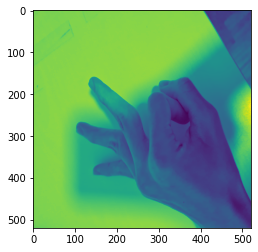

In [86]:
img = Image.fromarray(x_train[0])
plt.imshow(img)

In [87]:
print(f'There are {len(os.listdir(train_one))} training one')
print(f'There are {len(os.listdir(train_two))} training two')
print(f'There are {len(os.listdir(train_three))} training three')
print(f'There are {len(os.listdir(train_four))} training four')
print(f'There are {len(os.listdir(train_five))} training five')

There are 10 training one
There are 10 training two
There are 10 training three
There are 10 training four
There are 12 training five


In [56]:
y1 = [1 for i in range(10)]
y2 = [2 for i in range(10)]
y3 = [3 for i in range(10)]
y4 = [4 for i in range(10)]
y5 = [5 for i in range(12)]

yall = []
yall.extend(y1)
yall.extend(y2)
yall.extend(y3)
yall.extend(y4)
yall.extend(y5)
print(yall)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [57]:
y_train = np.array(yall)

In [58]:
cls = svm.SVC()
cls.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [110]:
path = '/content/train-hands/train-hands/two/20200731_094030.jpg'
img = Image.open(path).convert('L')
img = img.resize((520,520))
data = np.array(img)
data = data.reshape((1,-1))
data.shape

(1, 270400)

In [111]:
cls.predict(data)

array([3])

In [114]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  img = Image.open(fn).convert('L')
  img = img.resize((520,520))
  dat = np.array(img)
  dat = dat.reshape((1,-1))
  pred_class = cls.predict(dat)
  print(f'Predicted: {pred_class}')

Saving fiver.jpg to fiver.jpg
Predicted: [5]


In [112]:
pa = '/content/train-hands/train-hands/two/20200731_094030.jpg'
img = Image.open(pa).convert('L')
img = img.resize((520,520))
dat = np.array(img)
dat = dat.reshape((1,-1))
dat.shape

(1, 270400)

In [113]:
pred_class = cls.predict(dat)
print(f'Predicted: {pred_class}')

Predicted: [3]
